In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
np.random.seed(0)
n_pts = 500
X, y = datasets.make_circles(n_samples=n_pts, random_state = 123, noise=0.1, factor=0.2)
 
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])

Using TensorFlow backend.


In [2]:
model = Sequential()
model.add(Dense(4, input_shape=(2,), activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))
model.compile(Adam(lr = 0.01), 'binary_crossentropy', metrics=['accuracy'])
h=model.fit(x=X, y=y, verbose=1, batch_size=50,epochs=100, shuffle='true')

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Epoch 1/100
500/500 [==============================] - 1s 1ms/step - loss: 0.7045 - acc: 0.4840
Epoch 2/100
500/500 [==============================] - 0s 30us/step - loss: 0.6931 - acc: 0.3700
Epoch 3/100
500/500 [==============================] - 0s 34us/step - loss: 0.6923 - acc: 0.6080
Epoch 4/100
500/500 [==============================] - 0s 38us/step - loss: 0.6930 - acc: 0.6800
Epoch 5/100
500/500 [==============================] - 0s 40us/step - loss: 0.6925 - acc: 0.6740
Epoch 6/100
500/500 [==============================] - 0s 48us/step - loss: 0.6919 - acc: 0.5680
Epoch 7/100
500/500 [==============================] - 0s 34us/step - loss: 0.6911 - acc: 0.4320
Epoch 8/100
500/500 [==============================] - 0s 34us/step - loss: 0.6906 - acc: 0.4720
Epoch 9/100
500/500 [==============================] - 0s 36us/step - loss: 0.6900 - acc: 0.5760
Epoch 10

Text(0.5, 0, 'epoch')

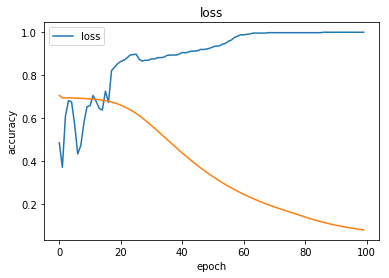

In [3]:
plt.plot(h.history['acc'])
plt.legend(['accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
 
plt.plot(h.history['loss'])
plt.legend(['loss'])
plt.title('loss')
plt.xlabel('epoch')

In [4]:
def plot_decision_boundary(X, y, model):
    x_span = np.linspace(min(X[:,0]) - 0.25, max(X[:,0]) + 0.25)
    y_span = np.linspace(min(X[:,1]) - 0.25, max(X[:,1]) + 0.25)
    xx, yy = np.meshgrid(x_span, y_span)
    grid = np.c_[xx.ravel(), yy.ravel()]
    pred_func = model.predict(grid)
    z = pred_func.reshape(xx.shape)
    plt.contourf(xx, yy, z)

Prediction is:  [[0.9587142]]


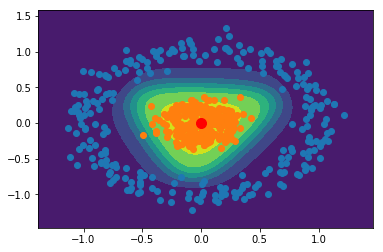

In [5]:
plot_decision_boundary(X, y, model)
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
 
x = 0
y = 0
point = np.array([[x, y]])
predict = model.predict(point)
plt.plot([x], [y], marker='o', markersize=10, color="red")
print("Prediction is: ", predict)